# In this Notebook:

1. Importing libraries
2. Importing data
3. Addressing PII security implications
4. Create a new column that categorises states into regions
5. Look at the difference in ordering habits across regions
5a. Where are the most loyal (frequent) customers located?
5b. In which region do customers spend most per order?
6. Exclude low activity customers

# 1. Importing Libraries

In [26]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2. Importing data

In [27]:
#creating path to Instacart folder
path = r"/Users/katerinapilota/Desktop/Desktop - Pilot's Mac mini/dataimmersion/python/ 02:03:21 Instacart Basket Analysis"

In [28]:
#importing data
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_combined_4'))

In [29]:
#call head of df
df_final.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,freq_flag,First_Name,Last_Name,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [30]:
df_final.columns

Index(['order_id', 'user_id', 'order_number', 'orders_days_of_the_week',
       'time_of_order_24hr_time', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'Busiest day',
       'Two busiest days', 'busiest_period_day', 'max_order', 'loyalty_flag',
       'mean_spend', 'spend_flag', 'median_ordering', 'freq_flag',
       'First_Name', 'Last_Name', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

# 3. Adressing security implications 

The columns 'First_name' and "Last_name' should be scrubbed in any analysis made public for ethical and security reasons.

In [31]:
df_final = df_final.drop(columns = ['First_Name', 'Last_Name'])

In [32]:
df_final.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spend_flag,median_ordering,freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


# 4. Create a new column that categorises states into regions

In [33]:
#checking contents of STATE column
df_final['STATE'].value_counts()

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [34]:
#creating the for-loop
result = []

for value in df_final['STATE']:
    if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
        result.append('Northeast')
    elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
        result.append('Midwest')
    elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
        result.append('West')
    else:
        result.append('South')

In [35]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [36]:
#creating the new column for the regions
df_final['region'] = result

In [37]:
#counting the frequency of the region column
df_final['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

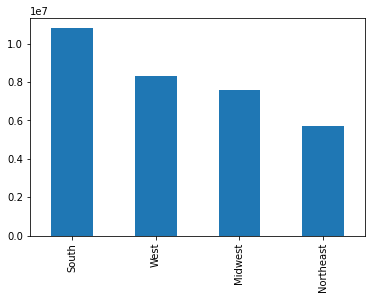

In [51]:
region_bar = df_final['region'].value_counts().plot.bar()

In [55]:
#save region_bar
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'region_bar.png'))

# 5. Look at the differences in ordering habits across regions

5a. How are loyal customers distributed across regions?

In [60]:
#check the count of freq_flag
df_final['freq_flag'].value_counts()

Frequent customer        22796659
Regular customer          6921472
Non-frequent customer     2686728
Name: freq_flag, dtype: int64

In [61]:
#create a crosstab of regions and freq_flag
crosstab_region_loyalty = pd.crosstab(df_final['region'], df_final['freq_flag'], dropna = False)

In [62]:
crosstab_region_loyalty

freq_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,5305756,640082,1651487
Northeast,4023693,469934,1229109
South,7602797,897977,2291111
West,5864413,678735,1749765


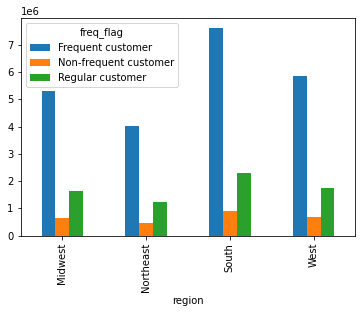

In [64]:
#plot bar chart using cross tab
bar_region_loyalty = crosstab_region_loyalty.sort_index().plot.bar()

In [65]:
#save bar_region_loyalty
bar_region_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_region_loyalty.png'))

As we might expect, as most orders come from the South and the least from the Northeast, the most and least frequent customers are location in the South and Northeast, respectively.

5b. In which region do customers spend most per order?

In [66]:
#check the frequency of the spend flag
df_final['spend_flag'].value_counts()

Low spender     31770742
High spender      634117
Name: spend_flag, dtype: int64

In [67]:
#create a crosstab to look at spending distributed across regions
crosstab_region_spend = pd.crosstab(df_final['region'], df_final['spend_flag'], dropna = False)

In [68]:
#display crosstab
crosstab_region_spend

spend_flag,High spender,Low spender
region,,
Midwest,155946,7441379
Northeast,108218,5614518
South,209637,10582248
West,160316,8132597


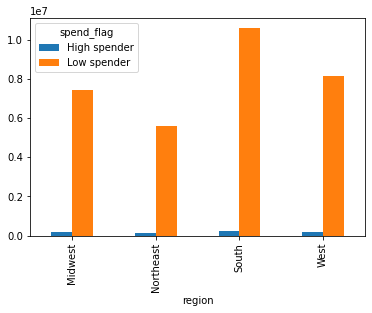

In [70]:
bar_region_spend = crosstab_region_spend.plot.bar()

In [72]:
#save bar_region_spend
bar_region_spend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_region_spend.png'))

From this visualisation, it's not immediately clear that there is much disparity between frequency and spending mean across regions.

Create a bar chart that gives us a closer look at high spenders across regions

In [73]:
#create a df using only high spenders
df_high_spender = df_final.loc[df_final['spend_flag'] == 'High spender']

In [74]:
df_high_spender.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_ordering,freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region
3855,3226575,360,1,5,12,0.0,196,1,0,Soda,...,4.0,Frequent customer,Male,Arizona,46,9/1/2017,1,married,104257,West
3856,3046940,360,2,2,8,4.0,5322,3,0,Gluten Free Dark Chocolate Chunk Chewy with a ...,...,4.0,Frequent customer,Male,Arizona,46,9/1/2017,1,married,104257,West
3857,2300993,360,3,1,13,6.0,5322,2,1,Gluten Free Dark Chocolate Chunk Chewy with a ...,...,4.0,Frequent customer,Male,Arizona,46,9/1/2017,1,married,104257,West
3858,3226575,360,1,5,12,0.0,41406,5,0,Orange Soda,...,4.0,Frequent customer,Male,Arizona,46,9/1/2017,1,married,104257,West
3859,2300993,360,3,1,13,6.0,28155,3,0,Premium Lager Beer,...,4.0,Frequent customer,Male,Arizona,46,9/1/2017,1,married,104257,West


In [75]:
#create a df using only low spenders
df_low_spender = df_final.loc[df_final['spend_flag'] == 'Low spender']

In [76]:
df_low_spender.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_ordering,freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [77]:
#create a crosstab that looks at high spenders across regions
crosstab_high_spender = pd.crosstab(df_high_spender['region'], df_high_spender['spend_flag'], dropna = False)

In [78]:
crosstab_high_spender

spend_flag,High spender
region,
Midwest,155946
Northeast,108218
South,209637
West,160316


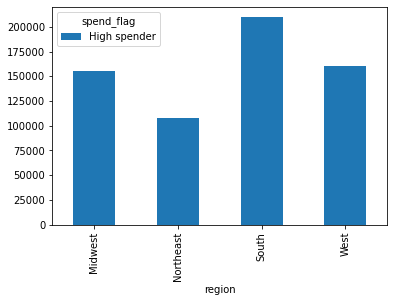

In [85]:
bar_region_high_spender = crosstab_high_spender.plot.bar()

In [86]:
bar_region_high_spender.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_region_high_spender.png'))

# 6. Exclude low activity customers

In [90]:
#use the 'max_order' column to store an exclsuion flag for customers with less than 5 orders
#using loc()
df_final.loc[df_final['max_order'] < 5, 'customer_activity'] = 'low_activity'

In [91]:
df_final.loc[df_final['max_order'] >= 5, 'customer_activity'] = 'regular_activity'

In [92]:
#create a new df that contains just low activity customers
df_low_activity = df_final[df_final['customer_activity'] == 'low_activity']

In [93]:
df_low_activity

,order_id,user_id,order_number,orders_days_of_the_week,time_of_order_24hr_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,freq_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,region,customer_activity
1510,520620,120,1,3,11,0.0,196,2,0,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1512,520620,120,1,3,11,0.0,46149,1,0,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
1514,520620,120,1,3,11,0.0,26348,3,0,Mixed Fruit Fruit Snacks,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,low_activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404828,1947537,166751,3,4,7,0.0,49001,1,1,Melatonin 2.5 Mg Sublingual Orange Tablets,...,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,West,low_activity
32404855,484769,66343,1,6,11,0.0,47210,1,0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,low_activity


In [94]:
#testing the length of low_activity df
len(df_low_activity)

1440295

In [96]:
df_low_activity.shape

(1440295, 32)

In [97]:
#exporting the low_activity df
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity.pkl'))

In [98]:
#updating df to exclude saved low activity customers
df_final = df_final[df_final['customer_activity'] == 'regular_activity']

In [99]:
df_final.shape

(30964564, 32)

In [101]:
df_final['customer_activity'].value_counts(dropna = False)

regular_activity    30964564
Name: customer_activity, dtype: int64

In [102]:
#exporting updating df to save
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_without_low.pkl'))

End.